# Projet scoring

## Bibliothèques utilisées

In [74]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

## Import du CSV

In [75]:
df = pd.read_csv('revenus.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Traitement des données

### Suppression de la colonne "fnlwgt"

In [76]:
df = df.drop(columns=['fnlwgt'])
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Suppression des valeurs manquantes

In [77]:
n_lignes_pre = len(df)

df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(inplace=True, drop=True)

n_lignes_post = len(df)

n_lignes_supr = n_lignes_pre - n_lignes_post
proportion_supr = round(n_lignes_supr / n_lignes_pre * 100,1)

print(f"{n_lignes_supr} individus ont été supprimées de la bdd, cela représente {proportion_supr}% de l'échantillon\nIl y a maintenant {n_lignes_post} individus")

3620 individus ont été supprimées de la bdd, cela représente 7.4% de l'échantillon
Il y a maintenant 45222 individus


### Graphiques données sans regroupement

#### Piechart variables quali

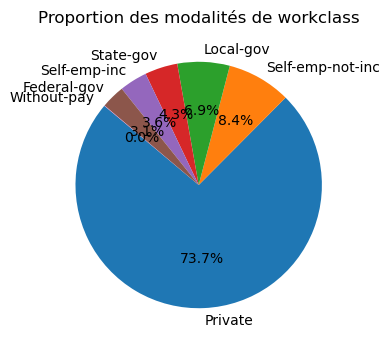

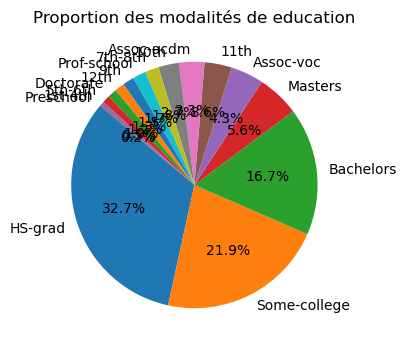

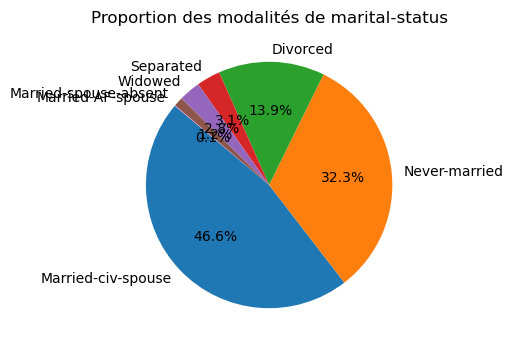

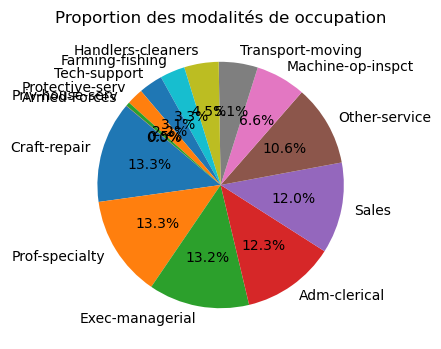

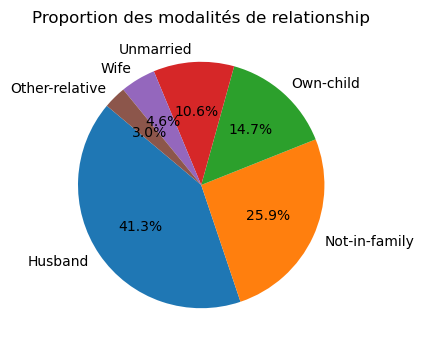

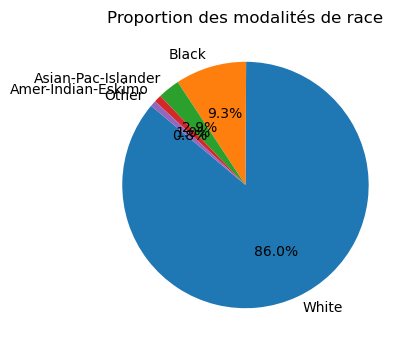

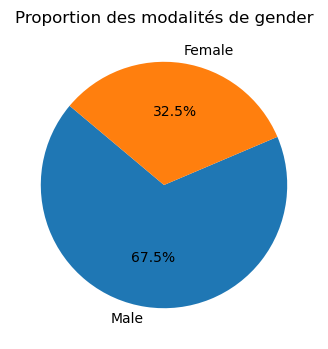

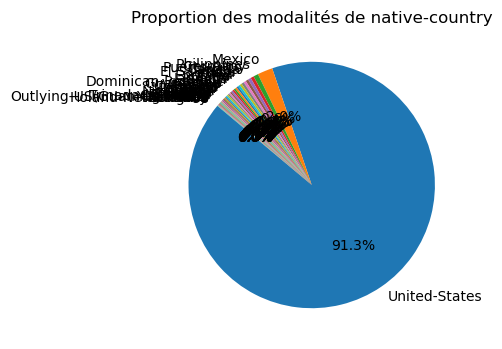

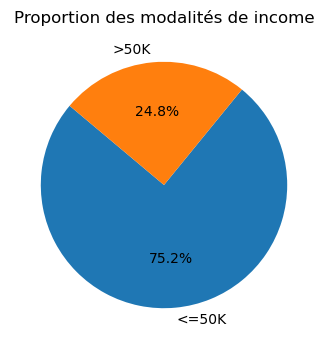

In [78]:
variables_quali = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']

# Boucle qui itere le processus suivant pour chaque variable qualitative
for col in variables_quali:

    # Calcule les proportions des différentes modalités
    prop_mod = df[col].value_counts()

    # Crée un pie chart grace a mathplotlib
    plt.figure(figsize=(4, 4))
    plt.pie(prop_mod, labels=prop_mod.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion des modalités de {col}")
    sns.color_palette("tab10")
    plt.show()

#### Graph variables quanti

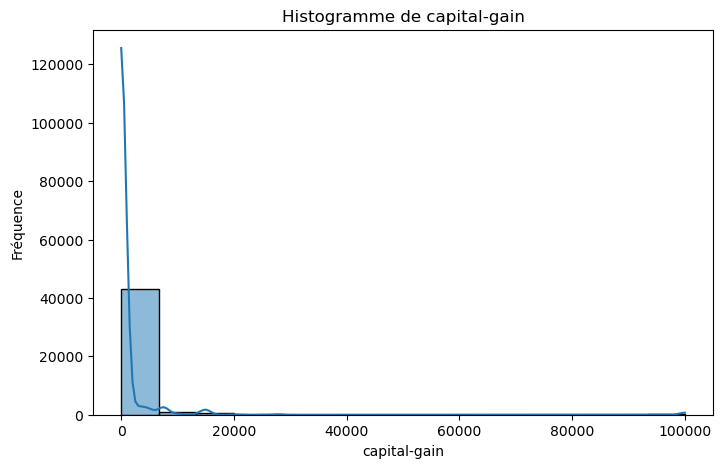

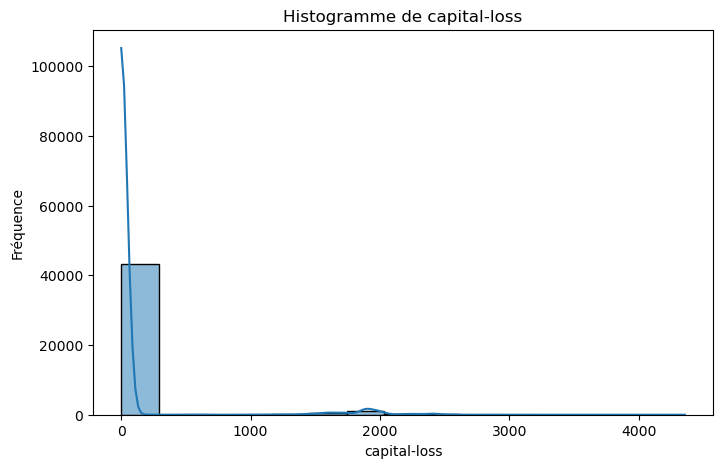

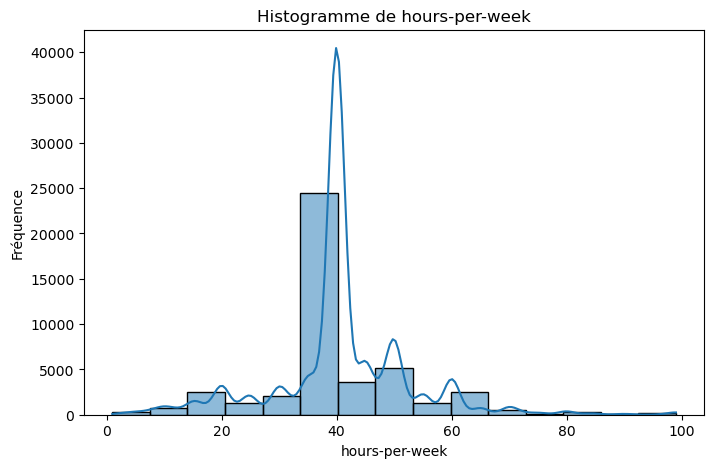

In [79]:
variables_histo = ['capital-gain', 'capital-loss', 'hours-per-week']
# Boucle qui itere le processus suivant pour chaque variable quantitatives
for variable in variables_histo:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[variable], kde=True, bins=15)
    plt.title(f'Histogramme de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()

C:\Users\theol\AppData\Local\Temp\ipykernel_10432\849426555.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe


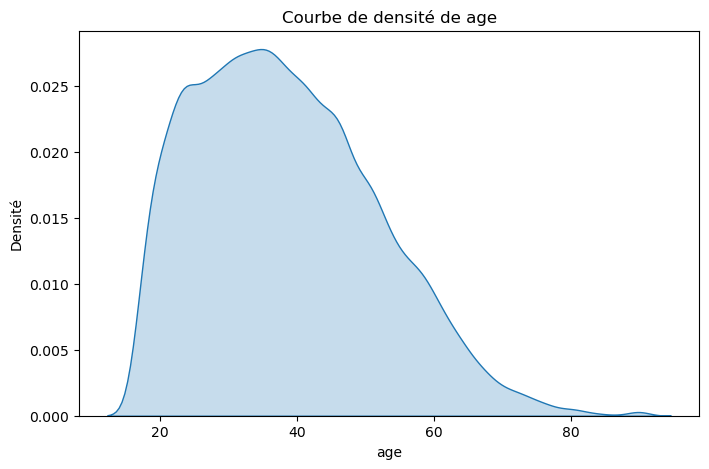

C:\Users\theol\AppData\Local\Temp\ipykernel_10432\849426555.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe


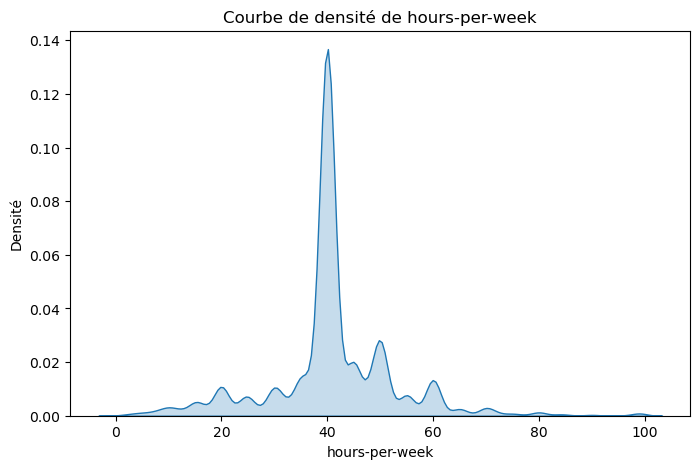

In [80]:
variable_courbe_dens = ['age','hours-per-week']

for variable in variable_courbe_dens:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe
    plt.title(f'Courbe de densité de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Densité')
    plt.show()

#### Boxplot Quanti

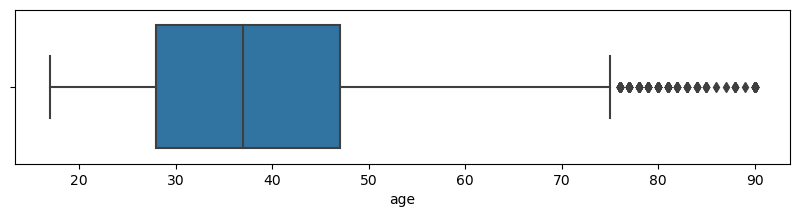

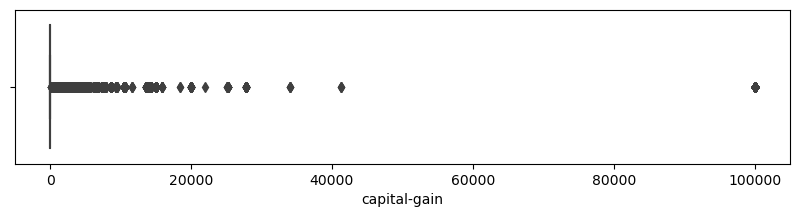

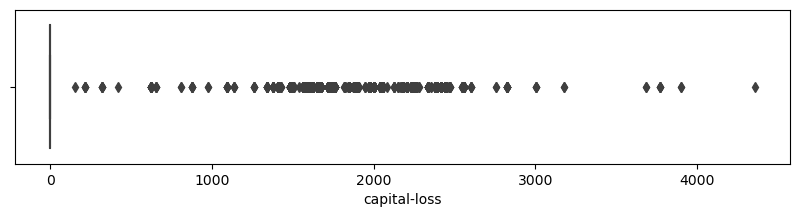

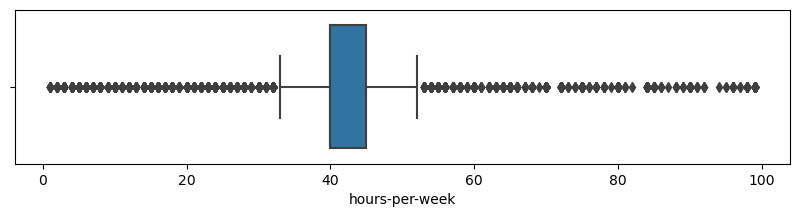

In [81]:
variables_quanti = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

for variable in variables_quanti:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[variable])
    plt.xlabel(variable)
    plt.show()

### Regroupement des modalités trop petites

In [82]:
df_test = df.copy()

df_test['race'] = df_test['race'].replace(
    {'Asian-Pac-Islander|Amer-Indian-Eskimo|Other': 'Other_race'}, 
    regex=True)

df_test['native-country'] = df_test['native-country'].replace(
    {'^(?!United-States$|Mexico$).+': 'Other_country'}, 
    regex=True)


### Graphiques du csv clean

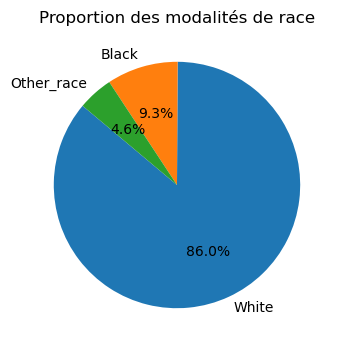

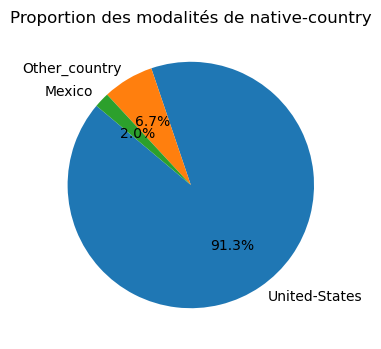

In [83]:
#variables_quali = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
variables_quali = ['race','native-country']

# Boucle qui itere le processus suivant pour chaque variable qualitative
for col in variables_quali:

    # Calcule les proportions des différentes modalités
    prop_mod = df_test[col].value_counts()

    # Crée un pie chart grace a mathplotlib
    plt.figure(figsize=(4, 4))
    plt.pie(prop_mod, labels=prop_mod.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion des modalités de {col}")
    sns.color_palette("tab10")
    plt.show()